In this assignment you will build models to predict quality of wines.  Please review the data dictionary and data provenance here:

https://archive.ics.uci.edu/ml/datasets/wine+quality

The target variable has been recoded as 1 (quality > 6) and 0 (quality < 7)

1. Load the data
2. Explore the distribution of the target variable
3. Assess if there are any missing values
4. Explore the information value and distribution of features using the pairplot

2 pts.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving winequality-red.csv to winequality-red.csv


In [2]:
import io
wine_data = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']), sep=';')

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


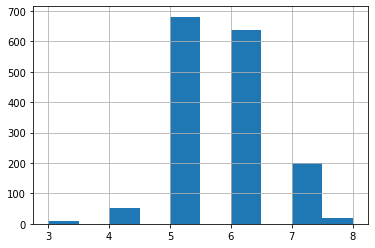

In [4]:
# Explore the distribution of the target variable (pre-recoding)

wine_data.quality.hist()

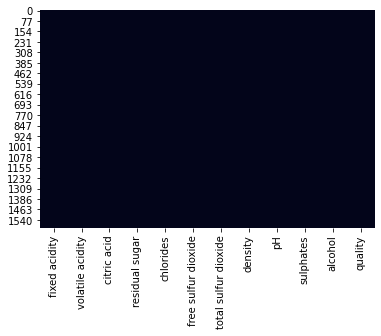

In [5]:
# Access if there are any missing values

sns.heatmap(wine_data.isnull(), cbar=False)

In [6]:
# Recode target variable

wine_data['quality_recoded'] = wine_data['quality'].apply(lambda x: 0 if x < 7 else 1)
                              
wine_data = wine_data.drop('quality', axis=1)

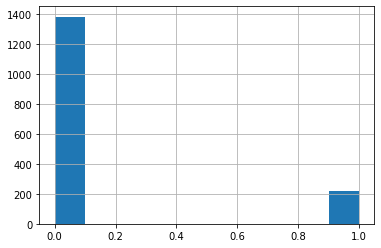

In [7]:
# Final histogram for target variable recoded

wine_data.quality_recoded.hist()

In [8]:
# Percentage of wine rated as Good

wine_data.quality_recoded.mean()

0.1357098186366479

In [9]:
# Explore dataset with .info()

wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_recoded       1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


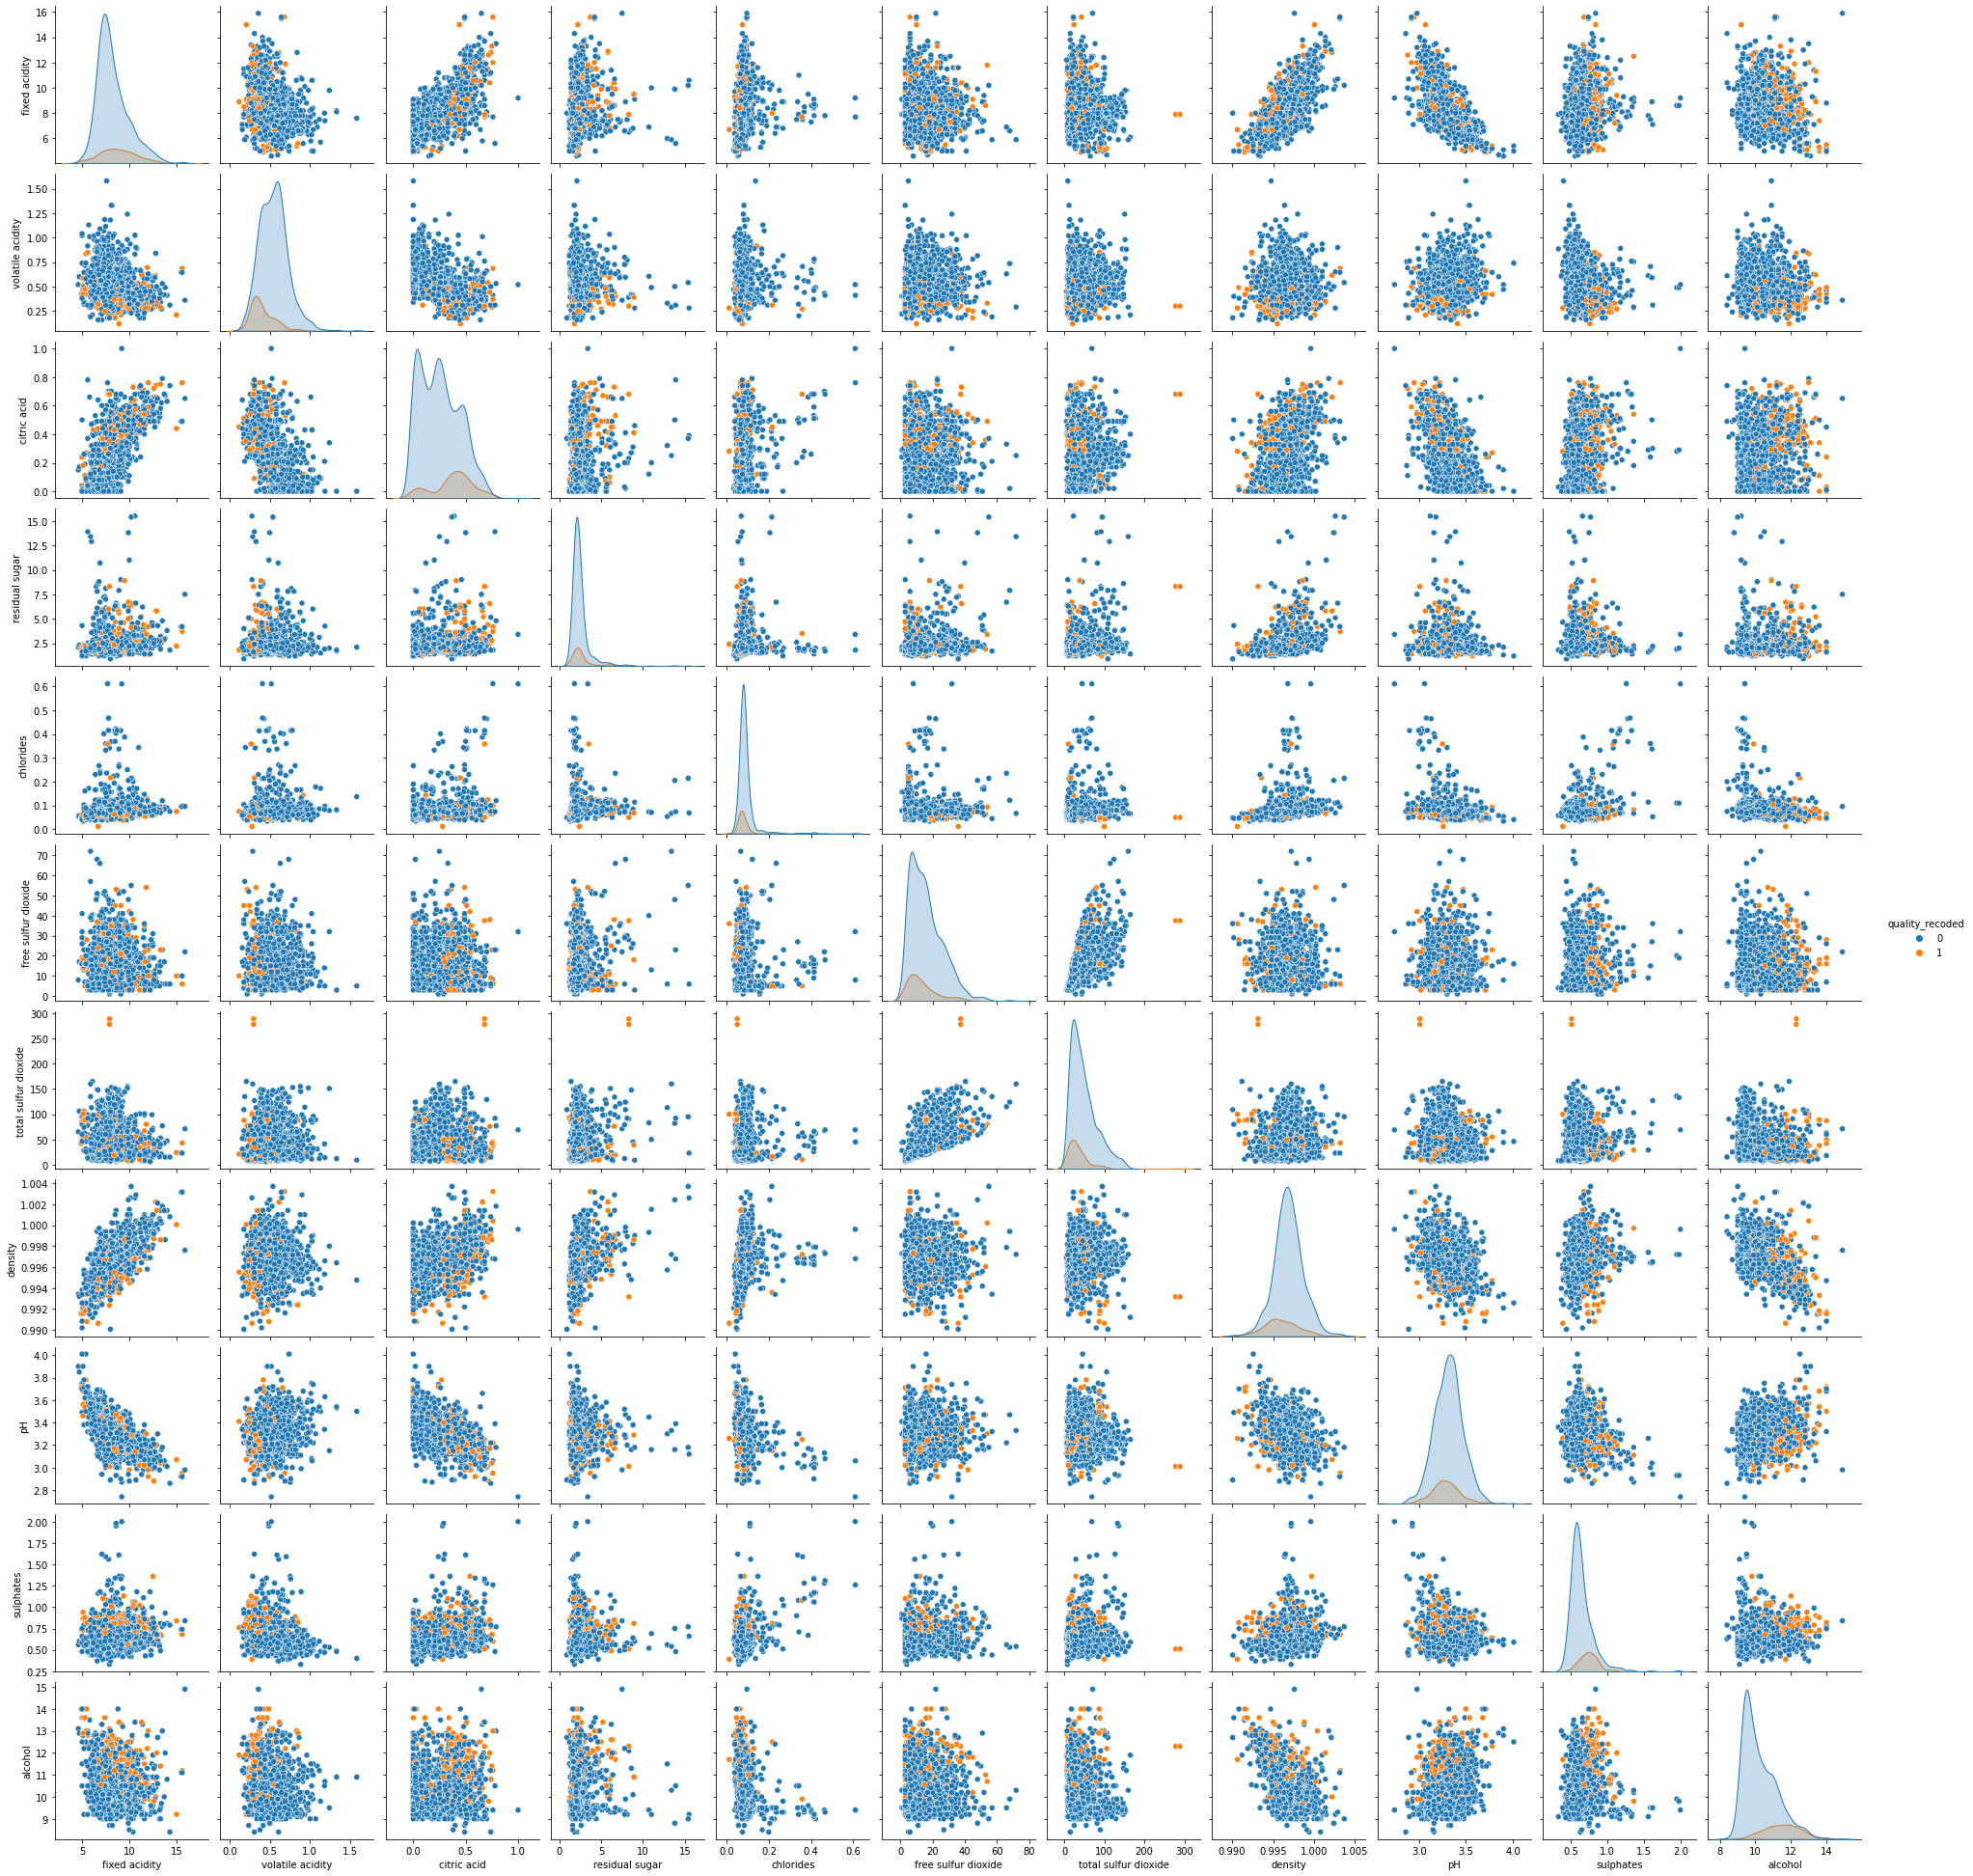

In [10]:
# Distribution of features using pairplot

sns.pairplot(wine_data, hue='quality_recoded')

5. Develop logistic regression, kNN (optimize k), random forest and boosted tree models to predict wine quality. Make sure to preprocess the data as needed by the respective models.

6. Assess the performance of each model using the following metrics: Recall, Precision, F1, ROC AUC.  Which is the best model based on ROC AUC?

18 pts.

In [11]:
X = wine_data.drop('quality_recoded', axis=1)
y = wine_data['quality_recoded']

In [12]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [13]:
y.mean()

0.1357098186366479

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
logit_model = sm.Logit(y_train, X_train)
logmodel = logit_model.fit()
print(logmodel.summary())

Optimization terminated successfully.
         Current function value: 0.276554
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        quality_recoded   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1108
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.3312
Time:                        15:13:55   Log-Likelihood:                -309.46
converged:                       True   LL-Null:                       -462.74
Covariance Type:            nonrobust   LLR p-value:                 6.384e-60
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0451      0.092      0.490      0.624      -0.135       0.225

In [16]:
# Dropping insignificant features identified by p-value evaluation

X = wine_data.drop(['quality_recoded', 'fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide'], axis=1)
y = wine_data['quality_recoded']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
# All remaining features are significant to the target variable Quality

logit_model_new = sm.Logit(y_train, X_train)
logmodel_new = logit_model_new.fit()
print(logmodel_new.summary())

Optimization terminated successfully.
         Current function value: 0.278817
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        quality_recoded   No. Observations:                 1119
Model:                          Logit   Df Residuals:                     1112
Method:                           MLE   Df Model:                            6
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.3258
Time:                        15:14:08   Log-Likelihood:                -312.00
converged:                       True   LL-Null:                       -462.74
Covariance Type:            nonrobust   LLR p-value:                 3.914e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -4.0470      0.759     -5.330      0.000      -5.535      -2.559

In [19]:
# Random Forest Model

rf_model = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [20]:
# RF Model results

print('Random Forest Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rf))
print('\n')
print('Random Forest Classification Report')
print(classification_report(y_test,y_pred_rf))
print('\n')
print('Random Forest ROC AUC:')
print(roc_auc_score(y_test,y_pred_rf))

Random Forest Confusion Matrix
[[416   9]
 [ 39  16]]


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       425
           1       0.64      0.29      0.40        55

    accuracy                           0.90       480
   macro avg       0.78      0.63      0.67       480
weighted avg       0.88      0.90      0.88       480



Random Forest ROC AUC:
0.6348663101604279


In [21]:
# Boosted Tree Model

bt_model = AdaBoostClassifier(n_estimators=100)
bt_model.fit(X_train, y_train)

y_pred_bt = bt_model.predict(X_test)

In [22]:
# BT Model results

print('Boosted Tree Confusion Matrix')
print(confusion_matrix(y_test, y_pred_bt))
print('\n')
print('Boosted Tree Classification Report')
print(classification_report(y_test,y_pred_bt))
print('\n')
print('Boosted Tree ROC AUC:')
print(roc_auc_score(y_test, y_pred_bt))

Boosted Tree Confusion Matrix
[[398  27]
 [ 29  26]]


Boosted Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       425
           1       0.49      0.47      0.48        55

    accuracy                           0.88       480
   macro avg       0.71      0.70      0.71       480
weighted avg       0.88      0.88      0.88       480



Boosted Tree ROC AUC:
0.7045989304812834


In [23]:
# Scaling data for KNN and Logistic Models

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [24]:
# Verification of rescaled data

X_rescaled.describe()

,volatile acidity,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.279329,0.125988,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.122644,0.078573,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184932,0.096828,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.273973,0.111853,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.356164,0.130217,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y.mean()

0.1357098186366479

In [26]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [27]:
# Logistics Regression Model

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_scaled,y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

In [28]:
# Log Model results

print('Logistic Regression Model Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lr))
print('\n')
print('Logistic Regression Model Classification Report')
print(classification_report(y_test, y_pred_lr))
print('\n')
print('Logistic Regression Model ROC AUC:')
print(roc_auc_score(y_test, y_pred_lr))

Logistic Regression Model Confusion Matrix
[[419   6]
 [ 44  11]]


Logistic Regression Model Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       425
           1       0.65      0.20      0.31        55

    accuracy                           0.90       480
   macro avg       0.78      0.59      0.62       480
weighted avg       0.88      0.90      0.87       480



Logistic Regression Model ROC AUC:
0.5929411764705882


In [29]:
# Finding Optimal Neighbors for KNN Model

max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn, X_train_scaled, y_train.values.ravel(),cv = 5, scoring = "roc_auc")
  cv_scores.append(scores.mean())

neighbors= []
i = 1
for i in range (i, 100):
  neighbors.append(i)
  i = i+1

neighbor_amount = pd.DataFrame(neighbors, columns= ['neighbors'])
neighbor_amount['roc_auc']= pd.DataFrame(cv_scores)
neighbor_amount.sort_values(by= 'roc_auc', ascending= False)

,neighbors,roc_auc
97,98,0.875374
13,14,0.875242
14,15,0.875225
98,99,0.875117
94,95,0.875089
...,...,...
4,5,0.847710
3,4,0.845396
2,3,0.836198
1,2,0.806232


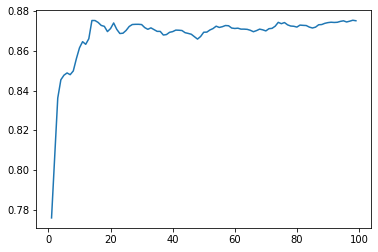

In [30]:
# Visual representation of cv scores

sns.lineplot(x=range(1,max_K), y=cv_scores)

In [31]:
# Optimal KNN Model

knn_model = KNeighborsClassifier(n_neighbors=98, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

In [32]:
# KNN Model results

print('KNN Model Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('\n')
print('KNN Model Classification Report')
print(classification_report(y_test, y_pred_knn))
print('\n')
print('KNN Model ROC AUC')
print(roc_auc_score(y_test, y_pred_knn))

KNN Model Confusion Matrix
[[421   4]
 [ 46   9]]


KNN Model Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       425
           1       0.69      0.16      0.26        55

    accuracy                           0.90       480
   macro avg       0.80      0.58      0.60       480
weighted avg       0.88      0.90      0.87       480



KNN Model ROC AUC
0.5771122994652407


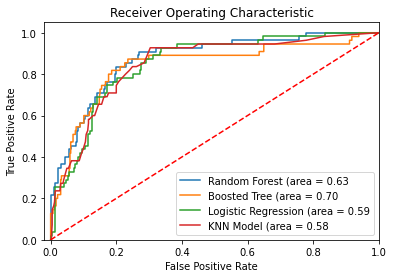

In [33]:
# AUC Curve with all models represented

rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

bt_roc_auc = roc_auc_score(y_test, bt_model.predict(X_test))
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

lr_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test_scaled))
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])

knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test_scaled))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted Tree (area = %0.2f' % bt_roc_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f' % lr_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The overall evaluation produced some rather interesting results. All models produced excellent results in the Precision and Recall (predictive and True) predictions of negative cases:

Random Forest 0: Precision - 0.91; Recall - 0.98
Boosted Trees 0: Precision - 0.93; Recall - 0.94
Logistic 0: Precision - 0.90; Recall - 0.99
KNN 0: Precision - 0.90; Recall - 0.99

F1 Random Forest 0: 0.95
F1 Boosted Trees 0: 0.93
F1 Logistic 0: 0.94
F1 KNN 0: 0.94

Where the models distinguish themselves from each other is in the combination of Precision and Recall of Positive cases. Random Forest, Logistic Regression and KNN models show higher results in predictive Positive cases however struggle severly in predicting True Positive cases (Recall). The Boosted Trees model stays consistent amongst both of those evaluations and has a much higher F1 score for Positive cases thus yielding a higher AUC overall.

Random Forest 1: Precision - 0.64; Recall - 0.29
Boosted Trees 1: Precision - 0.49; Recall - 0.47
Logistic 1: Precision - 0.65; Recall - 0.20
KNN 1 : Precision - 0.69; Recall - 0.16

F1 Random Forest 1: 0.40
F1 Boosted Trees 1: 0.48
F1 Logistic 1: 0.31
F1 KNN 1: 0.26

Final conclusion-
Based on the highest AUC Curve of 0.70, the Boosted Trees model is the best model for this dataset.